# Customer Intent Classification

In this project, we will harness the power of natural language processing (NLP) techniques and utilize the TensorFlow framework to build a model that 
can predict the intent behind a customer’s text input, enabling businesses to provide more personalized and efficient customer service.

This project is divided into the following:

Exploratory Data Analysis (EDA): This is a process to explore and understand the data’s underlying patterns, relationships, and characteristics. 
This process also includes data cleaning and data visualization.

Text Preprocessing: The text data undergoes preprocessing steps, including tokenization, sequence padding, label encoding, and other 
text-cleaning techniques. This prepares the data for input into the NLP model.

Training Model: With the designed neural network architecture, the model is trained on the preprocessed and converted data using an appropriate
loss function and optimizer. The training aims to minimize the classification error and optimize the model’s weights.

Evaluating Model: Once the model is trained, the model’s performance is assessed using a separate test dataset. The evaluation leverages an 
accuracy metric to measure how well the model can predict customer intents.



## Task 1: Import Libraries and Modules

In [1]:
# Write the code to import the required libraries here.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-10-13 11:02:18.317289: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-13 11:02:19.912911: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-13 11:02:19.916659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-13 11:02:23.929029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Write the code to import the required modules here.

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Task 2: Load the Datasets

In this task, load two sets of labeled data (train.csv and test.csv) provided in the workspace. These datasets are attached in here and consist 
of customer queries and their corresponding query intent categories. You’ll use them to train and evaluate an NLP model, specifically for the
banking context.

Follow the steps below to complete this task:

1. Load the training and test datasets into two separate DataFrames.

2. Print the first few rows of each dataset.



In [3]:
# Write the code to load the datasets here.

df_train = pd.read_csv("./usercode/train.csv")
df_test = pd.read_csv("./usercode/test.csv")

In [4]:
# Write the code to print the first five records of training set here.

df_train.head()

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [6]:
df_train.category.value_counts()

category
card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
                                                   ... 
lost_or_stolen_card                                  82
card_swallowed                                       61
card_acceptance                                      59
virtual_card_not_working                             41
contactless_not_working                              35
Name: count, Length: 77, dtype: int64

In [5]:
# Write the code to print the first five records of test set here.

df_test.head()

,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival


## Task 3: Check the Missing Values

In this task, ensure that training and test datasets don’t have any missing values before using them to train and test the NLP model.

Follow the steps below to complete this task:

1. Check for any null or missing values in the training and test datasets.

2. Remove the rows with missing values (if any).



In [7]:
# Write the code to check for missing values of training set here.

df_train.isnull().sum()

text        0
category    0
dtype: int64

In [8]:
# Write the code to check for missing values of test set here.

df_test.isnull().sum()

text        0
category    0
dtype: int64

In [9]:
# Write the code to remove the rows with missing values here.

df_train = df_train.dropna()
df_test = df_test.dropna()

## Task 4: Check the Target Balance

In this task, you’ll check the target balance from your training set. Target balance refers to examining the distribution of your dataset's target
or dependent variable. In this case, the target variable refers to the labeled intents that appear in the category column of the dataset.

Follow the steps below to complete this task:

1. Find the distinct (unique) values of customer intent from the category column. This will give you an idea of how many categories of customer intent 
appear in the dataset.

2. Get the counts for each unique value in the category column. This will provide a simple way to study the distribution of the target variable.

    

In [10]:
# Write the code to check the target balance here.

unique_values = df_train["category"].unique()
value_counts = df_train["category"].value_counts()
print(unique_values)
print(value_counts)

['card_arrival' 'card_linking' 'exchange_rate'
 'card_payment_wrong_exchange_rate' 'extra_charge_on_statement'
 'pending_cash_withdrawal' 'fiat_currency_support'
 'card_delivery_estimate' 'automatic_top_up' 'card_not_working'
 'exchange_via_app' 'lost_or_stolen_card' 'age_limit' 'pin_blocked'
 'contactless_not_working' 'top_up_by_bank_transfer_charge'
 'pending_top_up' 'cancel_transfer' 'top_up_limits'
 'wrong_amount_of_cash_received' 'card_payment_fee_charged'
 'transfer_not_received_by_recipient' 'supported_cards_and_currencies'
 'getting_virtual_card' 'card_acceptance' 'top_up_reverted'
 'balance_not_updated_after_cheque_or_cash_deposit'
 'card_payment_not_recognised' 'edit_personal_details'
 'why_verify_identity' 'unable_to_verify_identity' 'get_physical_card'
 'visa_or_mastercard' 'topping_up_by_card' 'disposable_card_limits'
 'compromised_card' 'atm_support' 'direct_debit_payment_not_recognised'
 'passcode_forgotten' 'declined_cash_withdrawal' 'pending_card_payment'
 'lost_or_sto

## Task 5: Display the Distribution of Labeled Intents

In this task, create a horizontal bar chart using the seaborn library to visualize the distribution of the labeled intents. A bar chart can better
visualize hidden patterns in the dataset.



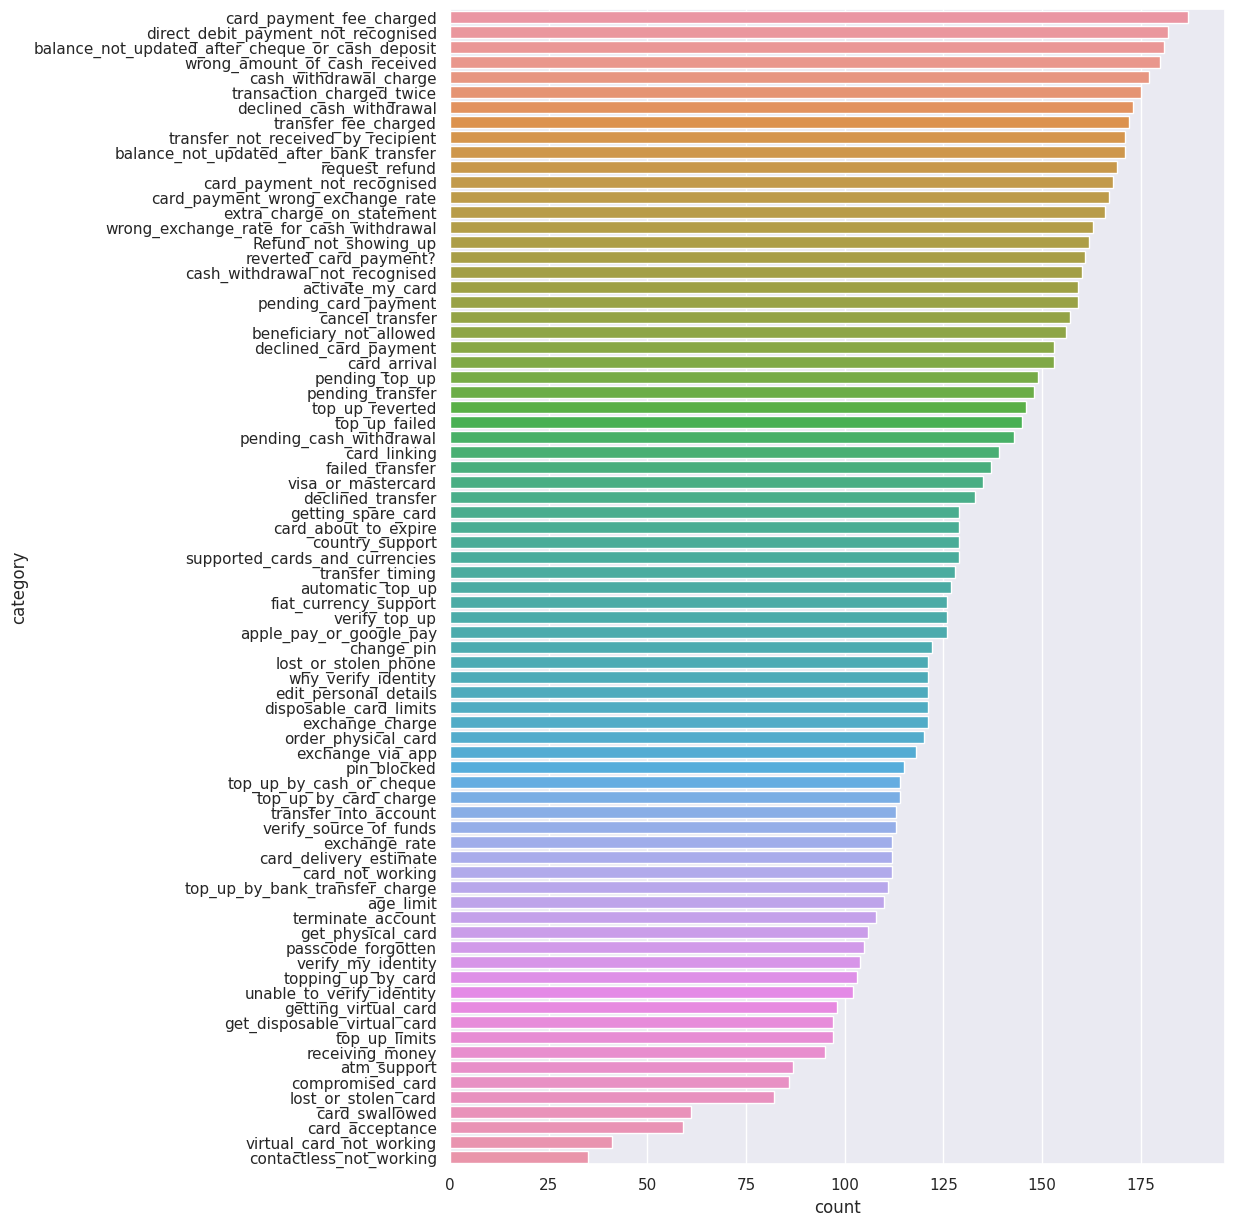

In [11]:
# Write the code to display the distribution here.

sns.set(rc={"figure.figsize":(10, 15)})
sns.countplot(data=df_train, y="category", order=df_train['category'].value_counts().index)
plt.show()

## Task 6: Shuffle the Dataset

In a later task, you’ll set aside some of the training data for the validation set. As the original training dataset is ordered by the category column,
some categories may be missing in the validation set. In order to preempt that, in this task, you should shuffle the training dataset.


In [12]:
# Write the code to shuffle dataset here.

df_train = df_train.sample(frac = 1)

## Task 7: Transform the Data

In this task, transform the text column in the training and test datasets from the pandas series to a NumPy array and save them in a new variable.
NumPy arrays provide advantages in terms of efficiency, memory usage, and compatibility with the TensorFlow library, making them the preferred option
for numerical and machine learning tasks.


In [13]:
# Write the code to transform data here.

train_data = df_train['text'].to_numpy()
test_data = df_test['text'].to_numpy()

In [15]:
pd.Series(train_data)

0        I put my check in the bank, but I haven't gott...
1        I found my card again. Can I put it back into ...
2        I'm travelling abroad but I've run into a situ...
3        Do I have to manually top-up my account each t...
4                          Do you support fiat currencies?
                               ...                        
9998       My payment is taking a long time to go through.
9999     Why have I been charged more than once for the...
10000    I made a payment but the app gave the money back.
10001    I'd like to make some changes to my personal i...
10002    What do I do if I can't get my card out of the...
Length: 10003, dtype: object

In [16]:
pd.Series(test_data)

0                                How do I locate my card?
1       I still have not received my new card, I order...
2       I ordered a card but it has not arrived. Help ...
3        Is there a way to know when my card will arrive?
4                            My card has not arrived yet.
                              ...                        
3075        If i'm not in the UK, can I still get a card?
3076                   How many countries do you support?
3077                What countries do you do business in?
3078               What are the countries you operate in.
3079           Can the card be mailed and used in Europe?
Length: 3080, dtype: object

## Task 8: Tokenize the Words

In this task, convert the NumPy arrays of texts generated in the previous task into tokens (a sequence of integers). Machine learning models, 
including neural networks, do not understand raw text. They require numerical input. Tokenization is used to convert raw text into a format that can 
be vectorized or turned into numerical representations.

Follow the steps below to complete this task:

1. Use variables to set the configuration parameters for tokenization, such as the vocabulary size and out-of-vocabulary (OOV) token.

2. Tokenize each word in the NumPy array of training data into an integer.

3. Convert each text from the NumPy array of training and test datasets into a sequence of integers.



In [17]:
# Write the code to set the configuration parameters for tokenization here.

vocab_size = 5000
oov_tok = '<OOV>'

In [18]:
# Write the code to use TensorFlow’s Tokenizer to convert words to integers here.

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

In [19]:
# Write the code to convert each text into a sequence of integers here.

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [22]:
train_sequences

[[2, 230, 3, 118, 27, 6, 123, 35, 2, 184, 486, 3, 37, 88],
 [2, 286, 3, 7, 436, 11, 2, 230, 9, 128, 134, 6, 48],
 [83,
  788,
  282,
  35,
  131,
  970,
  134,
  5,
  1084,
  57,
  2,
  36,
  4,
  109,
  3,
  65,
  358,
  11,
  2,
  10,
  31,
  39,
  210],
 [10,
  2,
  25,
  4,
  1085,
  23,
  16,
  3,
  17,
  839,
  138,
  132,
  52,
  9,
  10,
  9,
  29,
  300,
  594],
 [10, 18, 289, 359, 112],
 [50, 188, 4, 22, 20, 31, 221, 35, 217, 130, 329, 2, 74, 389, 15, 31, 8, 403],
 [301, 5, 515, 51, 29, 3, 110, 15],
 [14, 43, 6, 306, 12, 130, 20, 39, 5, 257],
 [15, 64, 3, 33, 25, 50, 413, 4, 3, 17],
 [15, 21, 2, 78, 39, 130, 37],
 [116, 2, 255, 3, 721, 159, 160, 2, 11, 53, 3, 17],
 [57, 11, 2, 139, 162, 294],
 [3, 7, 8, 503, 891, 6, 47],
 [8,
  30,
  5,
  397,
  4,
  118,
  12,
  51,
  12,
  190,
  2,
  840,
  86,
  83,
  130,
  44,
  278,
  145,
  91,
  151],
 [45, 59, 24, 41, 3, 7, 9, 224, 176],
 [211,
  83,
  595,
  3,
  892,
  1508,
  5,
  1509,
  554,
  27,
  1510,
  83,
  89,
  188,
  4

## Task 9: Pad the Training and Test Sequences

In this task, pad the training and test sequences to ensure that they are all of the same length. The input sequences for machine learning must have a 
uniform size.

Follow the steps below to complete this task:

1. Set the configuration parameters for sequence padding such as the maximum length of the sequence, padding type, and truncation type.

2. Perform sequence padding on the training and test sequences



In [23]:
# Write the code to set the configuration parameter for sequence padding here.

max_length = 50
trunc_type = 'post'
padding_type = 'post'

In [24]:
# Write the code to perform sequence padding here.

x_train = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

x_test = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Task 10: Encode the Labels

In this task, encode the labels of the training and test datasets into numerical numbers. A machine learning model requires numerical input features.
You cannot fit a model with text data.

Follow the steps below to complete this task:

1. Convert the category column of training and test datasets into an array of numerical labels and store them in separate arrays.

2. Reshape the arrays of encoded labels into two-dimensional arrays with n-rows and one column. The n refers to the size of the training or test dataset.
Create new variables to store the reshaped arrays.



In [25]:
# Write the code to convert the category column of training and test datasets here.

train_labels = pd.Categorical(df_train['category']).codes
test_labels = pd.Categorical(df_test['category']).codes

In [26]:
# Write the code to reshape the array of encoded labels into a two-dimensional array here.

y_train = train_labels.reshape((10003,1))
y_test = test_labels.reshape((3080,1))

In [27]:
y_train

array([[ 7],
       [14],
       [22],
       ...,
       [53],
       [31],
       [19]], dtype=int8)

In [28]:
y_test

array([[12],
       [12],
       [12],
       ...,
       [25],
       [25],
       [25]], dtype=int8)

## Task 11: Prepare a Validation Set

In this task, set aside 10% of the training dataset as a validation set to tune and validate the model’s performance during training. This helps to 
prevent overfitting and enables you to select the best model variant before evaluating the test dataset.



In [29]:
# Write the code to prepare validation set here.

partial_x_train = x_train[:9000]
partial_y_train = y_train[:9000]

x_val = x_train[9000:]
y_val = y_train[9000:]

## Task 12: Define a Neural Network Architecture

In this task, define a neural network architecture using TensorFlow’s Keras API. The model should have an embedding layer, a bidirectional LSTM layer, 
and two dense layers.



In [30]:
# Write the code to define neural network architecture here.

embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 77)                5005      
                                                                 
Total params: 399309 (1.52 MB)
Trainable params: 399309 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 13: Fit the Model

In this task, fit the model with the partial training set prepared in Task 11.

Follow the steps below to complete this task:

1. Set the training configurations such as the loss function, optimizer, and evaluation metrics.

2. Fit the model with the partial training dataset.

   

In [31]:
# Write the code to set the training configuration here.

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# Write the code to fit the model with the partial training dataset here.

num_epochs = 20

history = model.fit(partial_x_train, partial_y_train, epochs=num_epochs, validation_data=(x_val, y_val), verbose=2)

Epoch 1/20
282/282 - 20s - loss: 3.9471 - accuracy: 0.0431 - val_loss: 3.5135 - val_accuracy: 0.0748 - 20s/epoch - 70ms/step
Epoch 2/20
282/282 - 14s - loss: 2.8075 - accuracy: 0.2171 - val_loss: 2.2755 - val_accuracy: 0.3669 - 14s/epoch - 51ms/step
Epoch 3/20
282/282 - 15s - loss: 1.7317 - accuracy: 0.4887 - val_loss: 1.6034 - val_accuracy: 0.5653 - 15s/epoch - 52ms/step
Epoch 4/20
282/282 - 14s - loss: 1.1060 - accuracy: 0.6847 - val_loss: 1.2169 - val_accuracy: 0.6760 - 14s/epoch - 50ms/step
Epoch 5/20
282/282 - 15s - loss: 0.7571 - accuracy: 0.7830 - val_loss: 1.0391 - val_accuracy: 0.7418 - 15s/epoch - 52ms/step
Epoch 6/20
282/282 - 14s - loss: 0.5728 - accuracy: 0.8373 - val_loss: 0.9937 - val_accuracy: 0.7537 - 14s/epoch - 51ms/step
Epoch 7/20
282/282 - 15s - loss: 0.4457 - accuracy: 0.8779 - val_loss: 0.9716 - val_accuracy: 0.7667 - 15s/epoch - 52ms/step
Epoch 8/20
282/282 - 14s - loss: 0.3732 - accuracy: 0.8941 - val_loss: 0.9697 - val_accuracy: 0.7607 - 14s/epoch - 50ms/step


## Task 14: Plot Training and Validation Loss Curves

In this task, plot the training and validation loss curves to visualize the model’s loss value that evolved over training epochs. The loss curves help 
determine the model’s learning progress and detect overfitting or underfitting.

Follow the steps below to complete this task:

1. Convert the training history to a pandas DataFrame.

2. Plot both training and validation loss curves using the DataFrame as the data source.

    

In [33]:
# Write the code to convert the training history to a pandas DataFrame here.

df_history = pd.DataFrame(history.history)
df_history.rename(columns ={"loss": "train_loss"}, inplace=True)

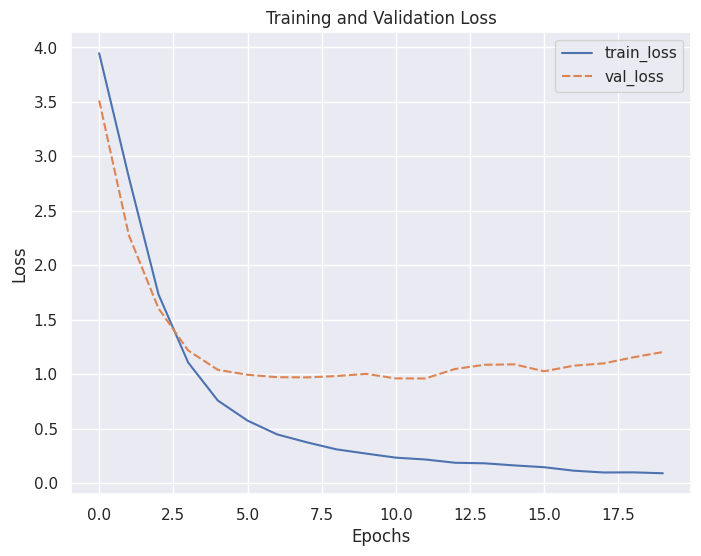

In [34]:
# Write the code to plot training and validation loss curves here.

sns.set(rc={"figure.figsize":(8, 6)})
my_plot = sns.lineplot(data=df_history[["train_loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel("Loss")
my_plot.set_title("Training and Validation Loss")
plt.show()

## Task 15: Retrain the Model

In this task, retrain your model with complete training datasets based on an optimum epoch number. The optimum epoch number is determined by 
identifying the point beyond which the training loss continues to decrease, while the validation loss starts to increase or plateau during the 
validation stage.


In [35]:
# Write the code to retrain model here.

# Epoch number may differ from your observation as the randomized training data.
num_epochs = 14  

model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(embedding_dim, activation='relu'),
 tf.keras.layers.Dense(77, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=num_epochs, verbose=2)

Epoch 1/14
313/313 - 19s - loss: 3.7205 - accuracy: 0.0858 - 19s/epoch - 61ms/step
Epoch 2/14
313/313 - 15s - loss: 1.9665 - accuracy: 0.4246 - 15s/epoch - 47ms/step
Epoch 3/14
313/313 - 15s - loss: 1.1632 - accuracy: 0.6606 - 15s/epoch - 49ms/step
Epoch 4/14
313/313 - 15s - loss: 0.7735 - accuracy: 0.7798 - 15s/epoch - 47ms/step
Epoch 5/14
313/313 - 15s - loss: 0.5669 - accuracy: 0.8395 - 15s/epoch - 49ms/step
Epoch 6/14
313/313 - 15s - loss: 0.4568 - accuracy: 0.8658 - 15s/epoch - 48ms/step
Epoch 7/14
313/313 - 16s - loss: 0.3585 - accuracy: 0.8985 - 16s/epoch - 50ms/step
Epoch 8/14
313/313 - 15s - loss: 0.2967 - accuracy: 0.9132 - 15s/epoch - 47ms/step
Epoch 9/14
313/313 - 15s - loss: 0.2610 - accuracy: 0.9241 - 15s/epoch - 49ms/step
Epoch 10/14
313/313 - 15s - loss: 0.2314 - accuracy: 0.9346 - 15s/epoch - 48ms/step
Epoch 11/14
313/313 - 15s - loss: 0.2256 - accuracy: 0.9312 - 15s/epoch - 49ms/step
Epoch 12/14
313/313 - 15s - loss: 0.1809 - accuracy: 0.9476 - 15s/epoch - 47ms/step
E

## Task 16: Examine the Model’s Performance with the Test Dataset

In this task, evaluate the trained model using the testing dataset. This will provide an unbiased estimation of its real-world performance. The 
expected test accuracy should be ~80%.


In [36]:
# Write the code to examine model's performance with test dataset here.

results = model.evaluate(x_test, y_test)

97/97 [==============================] - 2s 12ms/step - loss: 0.8289 - accuracy: 0.8179


In [38]:
results

[0.8289225697517395, 0.8178571462631226]

## Task 17: Predict the Outcomes for New Data

In this task, test the trained model with some new query text samples as provided below:

Sample text 1: "I am still waiting for my card, when will it arrive?" (Expected outcome: card_arrival)

Sample text 2: "Which fiat currency do you support?" (Expected outcome: fiat_currency_support)

Sample text 3: "Help, I just lost my card!" (Expected outcome: lost_or_stolen_card)

Follow the steps below to complete this task:

1. Convert the query text samples into padded sequences.

2. Use the trained model to predict the outcomes.



In [39]:
# Write the code to convert the query text samples into padded sequences here.

input_text = ["I am still waiting for my card, when will it arrive?",
                    "Which fiat currency do you support?",
                    "Help, I just lost my card!"]

input_text_arr = np.array(input_text)
input_text_sequences = tokenizer.texts_to_sequences(input_text_arr)
input_text_padded = pad_sequences(input_text_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



In [42]:
input_text_arr

array(['I am still waiting for my card, when will it arrive?',
       'Which fiat currency do you support?',
       'Help, I just lost my card!'], dtype='<U52')

In [41]:
input_text_sequences

[[2, 49, 63, 209, 12, 3, 7, 46, 52, 9, 370],
 [158, 359, 117, 10, 18, 289],
 [59, 2, 89, 166, 3, 7]]

In [40]:
input_text_padded

array([[  2,  49,  63, 209,  12,   3,   7,  46,  52,   9, 370,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [158, 359, 117,  10,  18, 289,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 59,   2,  89, 166,   3,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int32)

In [43]:
# Write the code to use the trained model to predict the outcomes here.

predictions = model.predict(input_text_padded)
predicted_classes = np.argmax(predictions,axis=1)

1/1 [==============================] - 1s 918ms/step


In [44]:
predicted_classes

array([12, 37, 14])

## Task 18: Match Predictions with Severity Levels

In this task, use the data from the severity_levels.csv file in the /usercode folder to match severity levels with predictions. The CSV file contains
two columns: one for category and one for severity_level. The severity_level has three classes as shown below:

High: This class represents customer intents that require an immediate/prompt response. Examples of such urgent issues are loss of card, canceled
transactions, unrecognized payments, etc.

Medium: This class represents customer intents that may have urgent concerns that require a quick response but may be less time-sensitive. Examples of
such situations include issues with card arrival, bank transfer status, passcode forgotten, etc.

Low: This class represents customer intents that only expect a response to some general inquiries. Such questions include exchange rates, card country 
support, age limit, etc.

Follow the steps below to complete this task:

1. Convert the predictions from the encoded numbers to the original category texts.

2. Match each predicted category to a severity level using the data loaded from the severity_levels.csv file.



In [45]:
# Write the code to convert the prediction to the original category text here.

df_train['category_codes'] = pd.Categorical(df_train['category']).codes
df_ref = df_train[["category", "category_codes"]]
df_ref = df_ref.drop_duplicates()
df_ref = df_ref.reset_index(drop=True)

predicted_categories = []

for x in predicted_classes:
  target_code = x
  category = df_ref[df_ref["category_codes"] == target_code]["category"].values[0]
  predicted_categories.append(category)

In [46]:
predicted_categories

['card_arrival', 'fiat_currency_support', 'card_linking']

In [47]:
# Write the code to match each prediction to the corresponding severity level here.

df_severity = pd.read_csv("./usercode/severity_levels.csv")

for y in predicted_categories:
  target_index = df_severity [df_severity ["category"]==y].index.values[0]
  level = df_severity._get_value(target_index, 'severity_level')
  print("Predicted Category: " + y)
  print("Severity Level: " + level )
  print("\n")

Predicted Category: card_arrival
Severity Level: Medium


Predicted Category: fiat_currency_support
Severity Level: Low


Predicted Category: card_linking
Severity Level: Low


